## Learning objectives for this notebook
- Describe Bernoulli and Normal models
- Understand the relationship between models and generated observations
- Predict how different parameters for a model will change what data is generated from that model.
- Use data generated from a model to find a good model for the data

# 1. Why Modeling
So far, we've only had a kind of visual intuition that there seems to be a difference between the fruits of the 2 genotypes but we don't really have any way to automatically discover this kind of thing.

The steps of the scientific process:
1. Form hypothesis
2. Gather data
3. Test hypothesis using data

In data science of couse we don't need to gather data but we still must form and test a hypothesis.

Possible steps of data science process:
1. Obtain and explore data (plots, number summaries)
2. Form hypothesis
3. Form model to test hypothesis
4. Test data against model.

What makes a hypothesis different from a model is that a model specifies a specific way to generate **new simulated observations** given a hypothesis. We can then see how similar the actual observations are to the generated observations.

1) Hypothesize probability of pandas to reproduce in a given zoo and year = 0.5
2) Create model that we can use to generate samples of 0 or 1, (whether or not the panda reproduced or not) of what kind of results you would get if the true rate was 0.5
3) Compare the observations generated from that model to the actual observations on panda reproduction to evaluate the model.


## 2. Back to Bernoulli

### 2.1 Sampling from a model
The model is a thing that generates data.

Models require input **parameters** that describe the distributions of the data it generates. Since the data is binary,  there is some Bernoulli model that fits it. The only input parameter here is the probability `p` of getting a 1 rather than a zero. Our hypothesis is about the value of that parameter.

We can make one (using python scipy stats package) and generate data from it with the `rvs` function.

By default this generates 1 observation (plant)

In [1]:
## some imports...
import pandas as pd
import seaborn as sns
sns.set_theme()
from scipy.stats import bernoulli


bernoulli.rvs(p=0.4)

0

We can ask it to generate any number with `size`

In [2]:
bernoulli.rvs(p=0.4, size = 3)

array([1, 0, 1])

Convince yourself that the data generated from different models is in fact different . 

**Exercise 2.1.1**: *A*. Generate 100 samples of 703 plants. From the `p=0.4` model. For each sample, store how many A's (1s) there are. 

In [28]:
p = []
for i in range(100):
    model = bernoulli.rvs(p=0.4, size=703)
    p.append(model.sum())

p

[313,
 274,
 284,
 253,
 288,
 279,
 304,
 265,
 280,
 273,
 286,
 279,
 260,
 284,
 262,
 271,
 266,
 282,
 302,
 262,
 282,
 294,
 289,
 301,
 282,
 276,
 273,
 285,
 290,
 284,
 259,
 284,
 288,
 272,
 283,
 278,
 280,
 278,
 260,
 281,
 286,
 269,
 287,
 280,
 281,
 286,
 291,
 263,
 267,
 287,
 296,
 286,
 271,
 272,
 288,
 262,
 289,
 299,
 274,
 288,
 277,
 279,
 293,
 289,
 280,
 286,
 288,
 254,
 262,
 279,
 287,
 292,
 288,
 278,
 272,
 289,
 289,
 298,
 289,
 263,
 294,
 290,
 288,
 287,
 277,
 292,
 282,
 303,
 280,
 275,
 300,
 300,
 300,
 315,
 256,
 287,
 271,
 293,
 287,
 275]

*B*. Make a histogram of the number of As. Interpret your histogram.

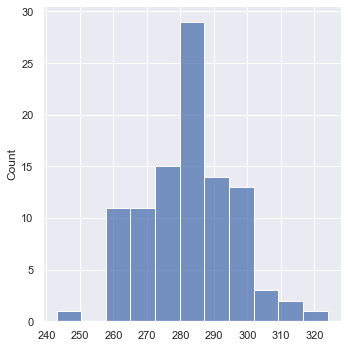

In [21]:
sns.displot(data=l)

**Exercise 2.1.2**: Copy and paste your code cell from above but change it to be  model with `p=0.9`. Compare the histograms.

In [22]:
l = []
for i in range(100):
    model = bernoulli.rvs(p=0.9, size=703)
    l.append(model.sum())

l

[632,
 625,
 636,
 643,
 636,
 652,
 616,
 627,
 625,
 647,
 630,
 638,
 631,
 624,
 620,
 618,
 629,
 622,
 637,
 635,
 634,
 631,
 633,
 627,
 633,
 628,
 637,
 638,
 639,
 642,
 631,
 636,
 636,
 629,
 645,
 614,
 625,
 633,
 636,
 633,
 638,
 630,
 632,
 629,
 618,
 648,
 634,
 643,
 636,
 649,
 610,
 628,
 626,
 633,
 632,
 634,
 626,
 622,
 633,
 636,
 634,
 635,
 629,
 636,
 637,
 644,
 614,
 626,
 640,
 626,
 628,
 635,
 632,
 636,
 636,
 634,
 635,
 618,
 632,
 622,
 632,
 636,
 634,
 631,
 631,
 624,
 618,
 640,
 620,
 643,
 618,
 634,
 624,
 639,
 624,
 644,
 633,
 631,
 642,
 634]

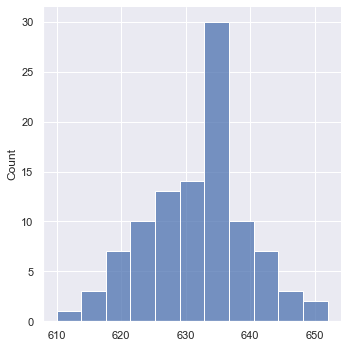

In [23]:
sns.displot(data = l)

<font color = lightgreen> The two histograms have a similar distribution, but the values for p = 0.4 range from 240 to 320, while for p = 0.9, they range from 610 to 655

## 2.2 Finding a good model for our data
Some models are *better* than other models in terms of how similar they are to our actual data. We compare our data to the models in order to decide which model is the best.

Back to our data. I'm converting it again to 0's and 1's to make it easier to compare to observations generated by a Bernoulli.

In [9]:

geno = pd.read_table("../data/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("../data/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)



In [10]:
binary_marker = (geno.loc['MASC06116',:]== 'A').astype(int)
binary_marker.describe()

count    703.000000
mean       0.928876
std        0.257214
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: MASC06116, dtype: float64

**Exercise 2.2.1**: Make 3 separate histograms: one for the real data, one for the generated data from from p=0.4, and one for generating data with p=0.9.

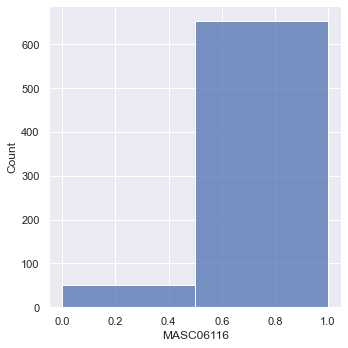

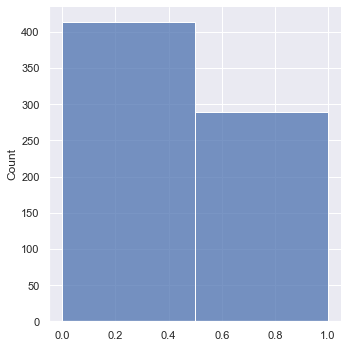

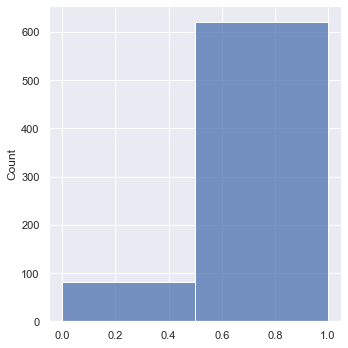

In [46]:
sns.displot(data=binary_marker, bins = 2)

sns.displot(data=bernoulli.rvs(p=0.4, size=703), bins=2)

sns.displot(data=bernoulli.rvs(p=0.9, size=703), bins=2)

**Exercise 2.2.2**: Create 100 evenly spaced values of p (probability of a 1 rather than 0) spaced out from 0 (never get a 1) to 1 (always get a 1). For each of these values, get the *squared difference* between the number of 1's in the generated data and in the real data. Save this into a data frame. Plot on the x-axis "p" and on the y-axis the squared difference.

91    0.919192
Name: p, dtype: float64


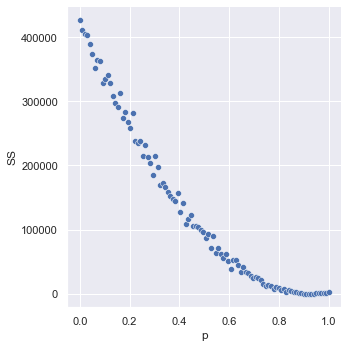

In [45]:
import numpy as np

bins = np.linspace(start=0, stop=1, num=100)
d = []
for p in bins:
    model = bernoulli.rvs(p=p, size=703)
    As = model.sum()
    d.append((As - binary_marker.sum())**2)

df = pd.DataFrame({'p':bins, 'SS':d})
# print(df.sort_values('SS', ascending=True).head(1).loc['p'])
sns.relplot(data=df, x='p', y='SS')

In [47]:
df

,p,SS
0,0.000000,426409
1,0.010101,410881
2,0.020202,404496
3,0.030303,403225
4,0.040404,389376
...,...,...
95,0.959596,676
96,0.969697,625
97,0.979798,1296
98,0.989899,1764


**Exercise 2.2.3**: Find the best value based on the smallest squared difference above in exercise 2.2.2. Generate the genotypes of plants from this model and plot the histogram, and compare it to the real data histogram and the other histograms form 2.2.1

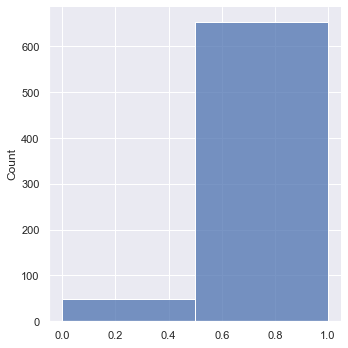

In [53]:
df = df.sort_values('SS', ascending=True)
best_model = bernoulli.rvs(p=df.loc[:,'p'].head(1), size=703)
sns.displot(data=best_model, bins=2)

<font color = lightgreen> It's really similar to the actual data!

# 3. Normal (Gaussian) model for number data
Just like with the Binary data and the Bernoulli, there are built-in models for number data.

The bell curve aka Normal aka Guassian model is good for modeling data that is:
- numbers
- most of them are close to the mean
- distribution is symmetricl

Just like the Bernoulli we can import the `norm` (normal) and use it to generate observations. 

And just like the Bernoulli we can tell it to use  particular **parameters**. The first one we'll learn is called `loc` which specifies the mean. The default is 0:

In [ ]:
from scipy.stats import norm
norm.rvs()

Another `loc`.

In [ ]:
norm.rvs(loc = 10)

Sme thing with the size argument

In [ ]:
norm.rvs(loc = 10, size=5)

**Exercise 3.1**: Generate 1000 observations of the distribution under models with different values for `loc` (such as, -5, 1, 100). Plot each in a histogram. What do you notice?

**Exercise 3.2 (think & discuss)**: Look at the histogram of the fruit_length data. What model could you make that could generate observations that look like that:
- Would you use Bernoulli or normal? Why?
- What do you think would be a good `loc` to make a model of the fruit_length?

In [ ]:
sns.displot(data=pheno, x="fruit_length")

**Exercise 3.3**: *A*. Generate the data from your chosen model for the same number of plants as there is in the real data. Fill in the line below to make a data frame containing your real and generated data. 

In [ ]:
generated =  ## fill this in
lengths = np.append(pheno['fruit_length'].values, generated)
real = ['real']*pheno.shape[0]
gen = ['generated']*pheno.shape[0]
is_real = real + gen
toplot = pd.DataFrame({'fruit_length':lengths,
                       'is_real': is_real
                      })



*B*. Make a histogram that plots the real data and the generated data. Discuss: are you happy with your model? Does it seem to fit the data?

**Exercise 3.4 (discuss as a group)**: The code above uses some Python I have not taught you. What is it doing? Add comments to the code.

The reason the generated data doesn't look so good is because it is too wide. There is a second **parameter** called **`scale`** which controls how wide it is.

**Exercise 3.5**: Generate 703 observations of the distribution under models with the same loc above but different values for  values for `scale` (it must be greater than zero, you can't have a negative width)-- try 1, 5, 100). Plot each in a histogram. What do you notice?



**Exercise 3.6**: Plot a histogram of bolting days. Would a normal model be appropriate for bolting days?

**Exercise 3.7**: 
1. Create 20 evenly spaced values of `loc`  spaced out from 0 to 30. 
2. For each of these values, generate your plants, and get the squared difference in means like in 2.2.2. 


3. Plot on the x-axis "loc" and on the y-axis the squared difference in means.

4. Get the value where the difference is smallest 

**Exercise 3.8**: Repeat 3.7 but keeping your loc you picked in 3.7 and with 20 evenly spaced values for scale. Find the best secale.